# K-Means Homemade

Below and application of our homemade algorithm, and its benchmark with `sklearn` KMeans.

In [58]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Import our library
import kmeans_homemade.kmeans as khm

We're using the `iris` dataset for this benchmark. See more [here]().

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
x_train = pd.DataFrame(X, columns = iris.feature_names)
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Quickly apply PCA on 2d to visualize it

<AxesSubplot:xlabel='0', ylabel='1'>

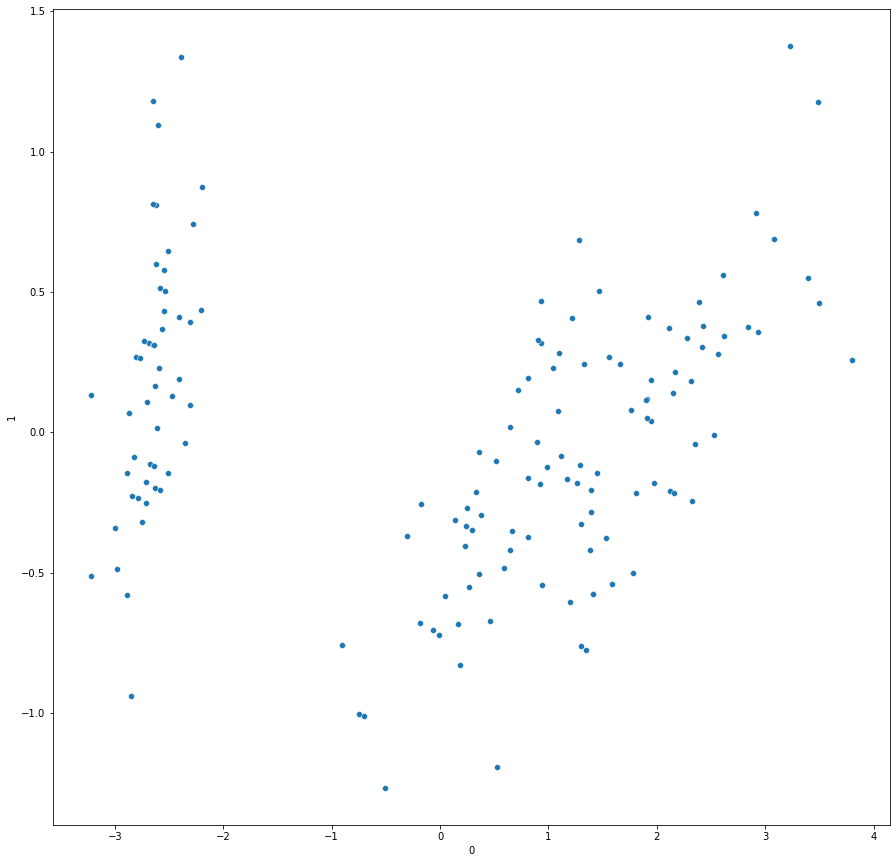

In [16]:
# Reduce Dimensionality
pca_2d = PCA(n_components = 2).fit_transform(x_train)
pca_2d = pd.DataFrame(pca_2d)

# Plot
plt.figure(figsize=(15, 15))
sns.scatterplot(data = pca_2d, x = 0, y = 1)

## Fitting KMeans Homemade

We can load the data into our object and `fit` KMeans

In [59]:
# Load object
k_model = khm.KMeans(n_clusters = 3 , X = x_train)

In [60]:
k_model.__doc__.split('\n')

['',
 '        Class to handle KMeans Clustering',
 '',
 '        Parameters',
 '        ----------',
 '        X: pd.DataFrame or np.ndarray',
 '            Data set to cluster on. Will be converted',
 '            to np.ndarray for faster computation.',
 '',
 '        k : int',
 '            Number of k clusters.',
 '       ']

In [61]:
k_model.fit()

Fitting KMeans with 3 K
Converged with 12 iterations


### Attributes

In [67]:
# Number of iterations
print(f'\nNumber of iterations \n {k_model.n_iter}')

# Cluster centroids
print(f'\nCluster centroids \n {k_model._centroids}')

# Assigned clusters/labels
print(f'\nAssigned Clusters \n {k_model._clusters}')

# Feature names (if available)
print(f'\nFeature Names \n {k_model.features}')

# Total Variance
print(f'\nTotal Variance \n {k_model.total_sse}')


Number of iterations 
 12

Cluster centroids 
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]

Assigned Clusters 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]

Feature Names 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Total Variance 
 78.8556658259773


### Visualising Clusters

12


<AxesSubplot:xlabel='0', ylabel='1'>

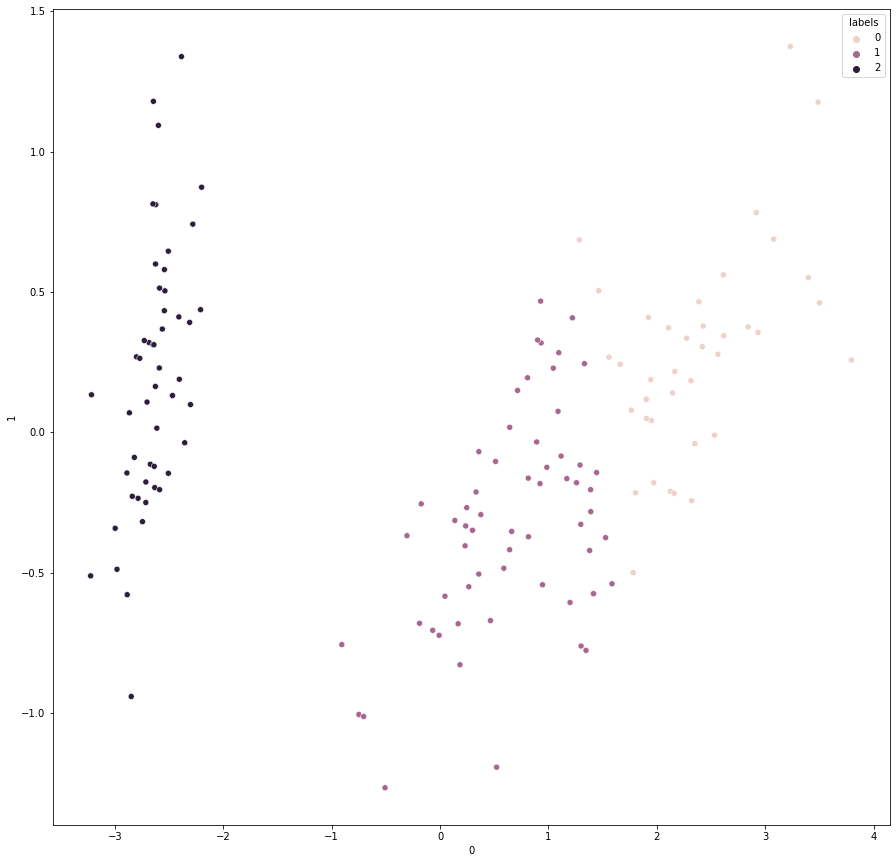

In [66]:
print(k_model.n_iter)
pca_2d['labels'] = k_model._clusters

import seaborn as sns
plt.figure(figsize=(15, 15))
sns.scatterplot(data = pca_2d, x= 0, y=1, hue = "labels")

## Benchmarking

We can benchmark this model with that applied from `sklearn`.

In this case, we choose `init='random'`. This will do the same as our homemade algorithm: initialize random clusters.

By default, `KMeans` uses a smarter and faster way of initialising random centroids, instead of random clusters. This ensures faster convergence.

We're too lazy to do that here so we will compare the random method.

<AxesSubplot:xlabel='0', ylabel='1'>

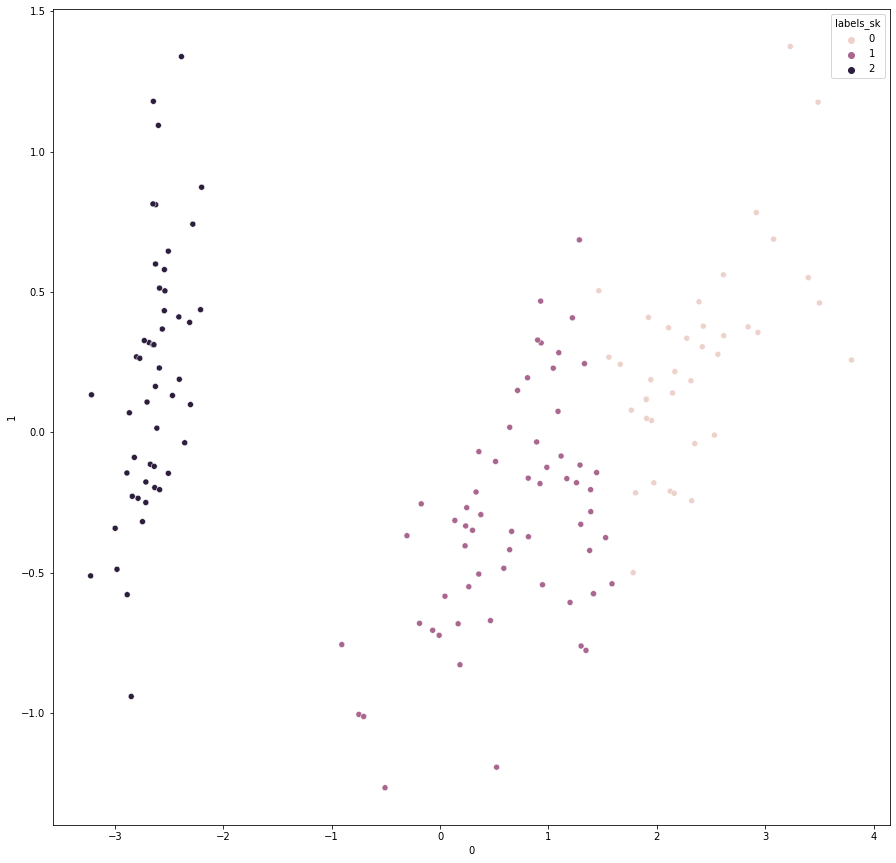

In [69]:
fit_k_sk = KMeans(n_clusters = 3, init = 'random', random_state = 24).fit(x_train)

# Add Labels to PCA
pca_2d['labels_sk'] = fit_k_sk.predict(x_train)
plt.figure(figsize=(15, 15))
sns.scatterplot(data = pca_2d, x= 0, y=1, hue = "labels_sk")

In [74]:
print(f'Comparing Score: \n sklearn KMeans {-fit_k_sk.score(X)} \n Homemade KMeans {k_model.total_sse}')

Comparing Score: 
 sklearn KMeans 78.85144142614601 
 Homemade KMeans 78.8556658259773


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [82]:
print(f'Comparing centroids: \n sklearn KMeans \n {fit_k_sk.cluster_centers_} \n\n Homemade KMeans \n{k_model._centroids}')

Comparing centroids: 
 sklearn KMeans 
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]] 

 Homemade KMeans 
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


In [81]:
print(f'Comparing iterations: \n sklearn KMeans \n {fit_k_sk.n_iter_} \n Homemade KMeans \n{k_model.n_iter}')

Comparing iterations: 
 sklearn KMeans 
 6 
 Homemade KMeans 
12


In [83]:
# Compare labels difference
np.where((fit_k_sk.labels_ - k_model._clusters) != 0)

(array([50]),)

Only one point was slightly misclassified by our algorithm, in comparison with sklearn.

# Conclusion

Above a comparison of our homemade KMeans model with `sklearn` KMeans. Our model is clearly not as efficient, and no one is ever going to use it, but this shows to prove how we can easily de-mistify an algorithm with some lines of code, and little help from external libraries.